In [121]:
import torch
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models.detection import retinanet
from torchvision.utils import draw_bounding_boxes

In [105]:
model = retinanet_resnet50_fpn(pretrained= True)

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /Users/chandrish/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

In [9]:
model.eval()

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, e

In [10]:
for name, param in model.named_parameters():
    print(name, param)

backbone.body.conv1.weight Parameter containing:
tensor([[[[ 1.3335e-02,  1.4664e-02, -1.5351e-02,  ..., -4.0896e-02,
           -4.3034e-02, -7.0755e-02],
          [ 4.1205e-03,  5.8477e-03,  1.4948e-02,  ...,  2.2060e-03,
           -2.0912e-02, -3.8517e-02],
          [ 2.2331e-02,  2.3595e-02,  1.6120e-02,  ...,  1.0281e-01,
            6.2641e-02,  5.1977e-02],
          ...,
          [-9.0349e-04,  2.7767e-02, -1.0105e-02,  ..., -1.2722e-01,
           -7.6604e-02,  7.8453e-03],
          [ 3.5894e-03,  4.8006e-02,  6.2051e-02,  ...,  2.4267e-02,
           -3.3662e-02, -1.5709e-02],
          [-8.0029e-02, -3.2238e-02, -1.7808e-02,  ...,  3.5359e-02,
            2.2439e-02,  1.7077e-03]],

         [[-1.8452e-02,  1.1415e-02,  2.3850e-02,  ...,  5.3736e-02,
            4.4022e-02, -9.4675e-03],
          [-7.7273e-03,  1.8890e-02,  6.7981e-02,  ...,  1.5956e-01,
            1.4606e-01,  1.1999e-01],
          [-4.6013e-02, -7.6075e-02, -8.9648e-02,  ...,  1.2108e-01,
         

In [13]:
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]

In [14]:
%%time
predictions = model(x)

/Users/chandrish/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [15]:
predictions

[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
  'scores': tensor([], grad_fn=<IndexBackward0>),
  'labels': tensor([], dtype=torch.int64)},
 {'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
  'scores': tensor([], grad_fn=<IndexBackward0>),
  'labels': tensor([], dtype=torch.int64)}]

### Reading the video and getting frames out of it

In [134]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
import skimage

In [29]:
video = cv2.VideoCapture('data/dogvbaby.mp4')
ret = True
frames = []
while ret:
    ret, frame = video.read()
    frames.append(frame)

In [31]:
len(frames)

415

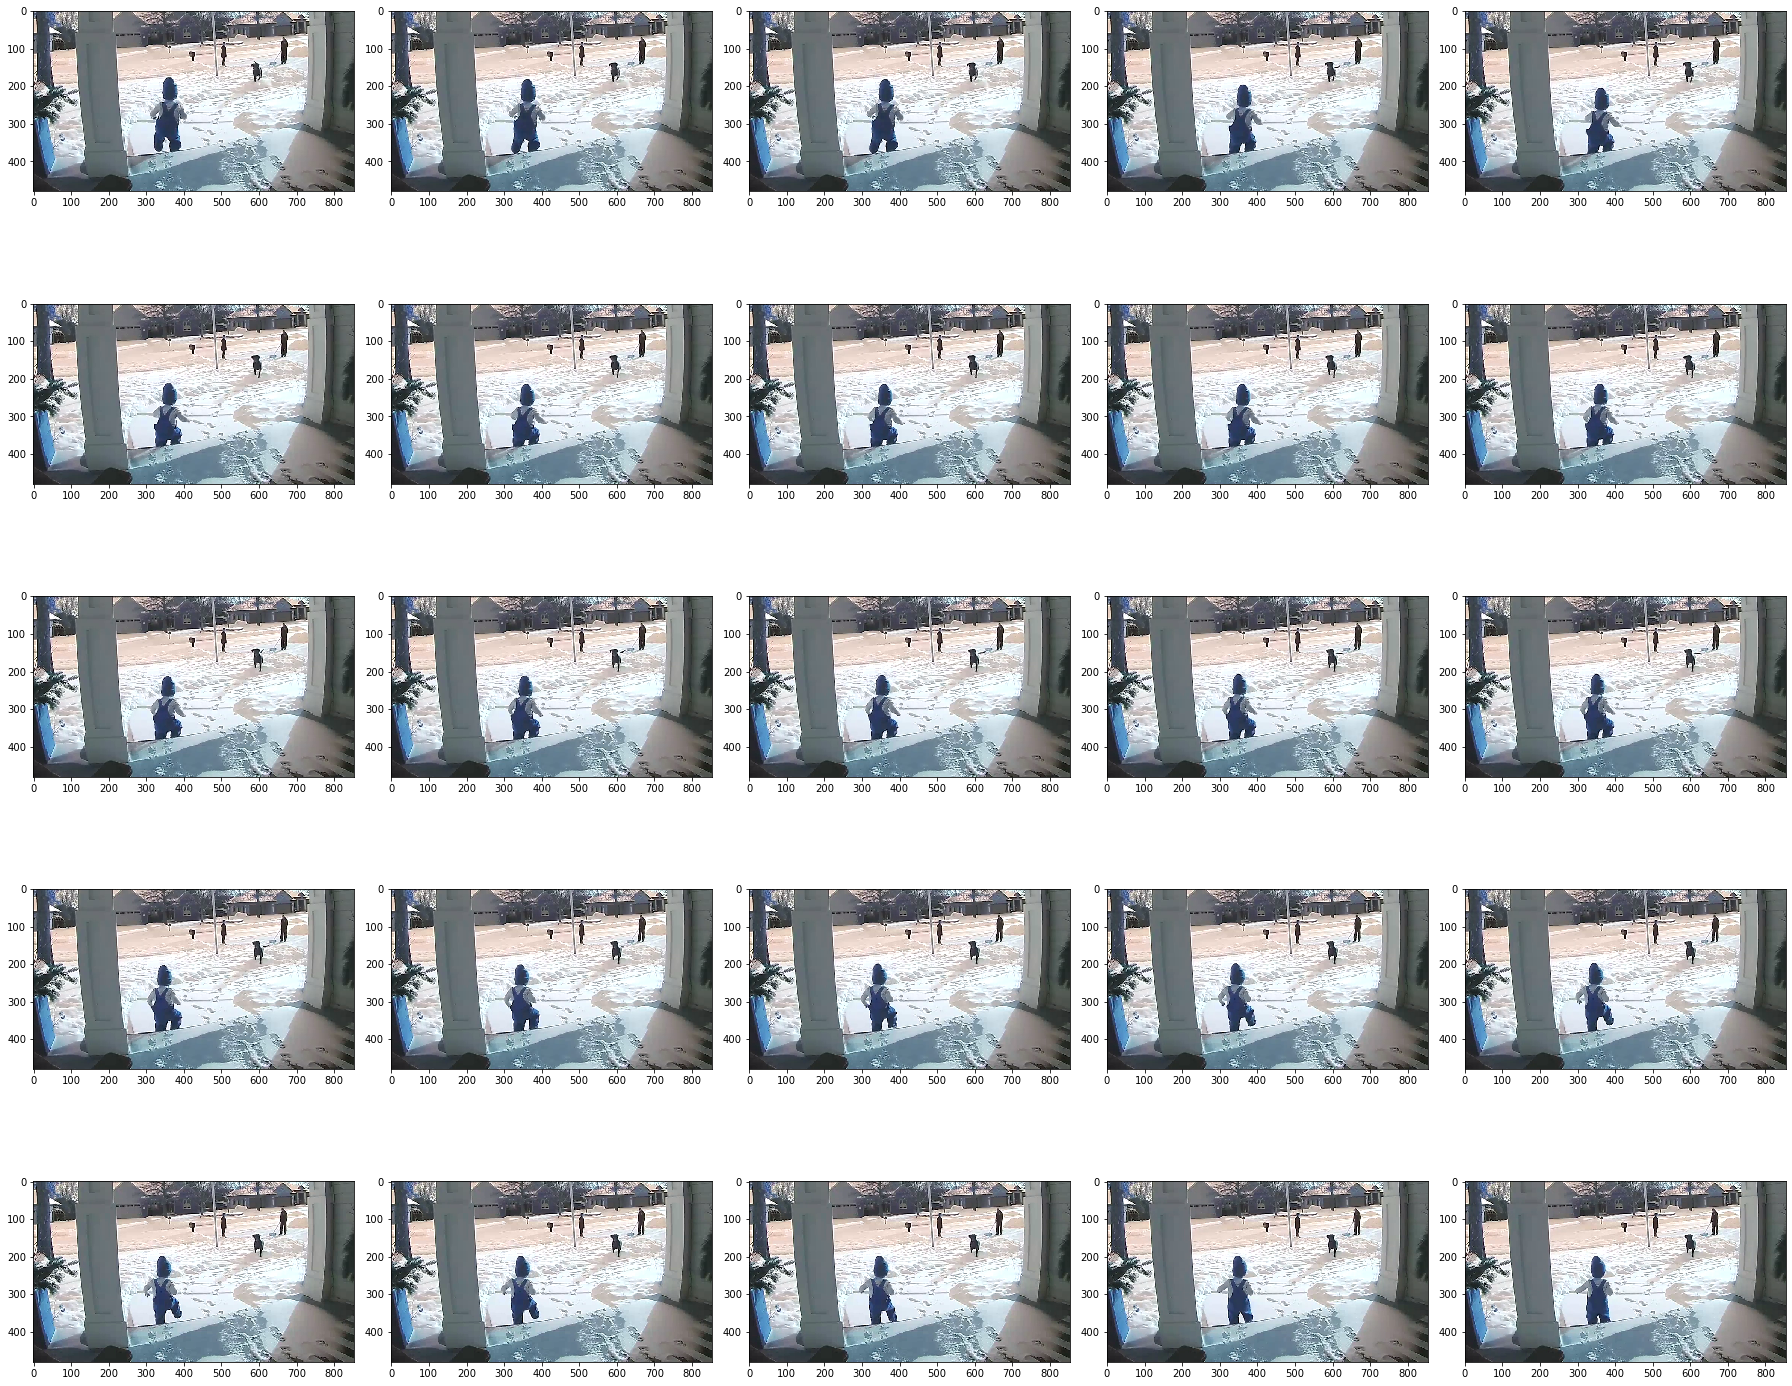

In [42]:
fig, ax = plt.subplots(5, 5, figsize = (25, 25))
ax = ax.flatten()
for axi, i in enumerate(range(100, 125)):
    io.imshow(frames[i], ax = ax[axi])
plt.tight_layout()
plt.show()

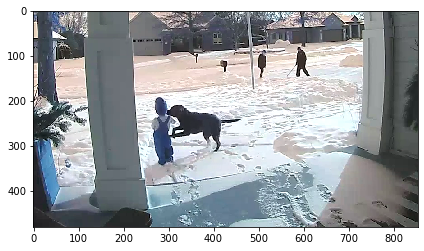

In [117]:
io.imshow(frames[260])
plt.show()

In [123]:
# passing the 200th frame for inference
t_frame = torch.tensor(frames[260], dtype = torch.float)
t_frame_norm = t_frame/255

In [122]:
io.imshow(t_frame_norm.numpy())

tensor(255.)

In [124]:
%%time
model.eval()
pred = model([t_frame_norm.permute(2, 0, 1)])

CPU times: user 13.5 s, sys: 446 ms, total: 13.9 s
Wall time: 13 s


In [132]:
# drawing boxes
score_threshold = .5
dogs_with_boxes = draw_bounding_boxes(t_frame.permute(2, 0, 1).type(torch.uint8), \
                                      boxes=pred[0]['boxes'][pred[0]['scores'] > score_threshold], \
                                      colors = 'red', width=4)
#show(dogs_with_boxes)

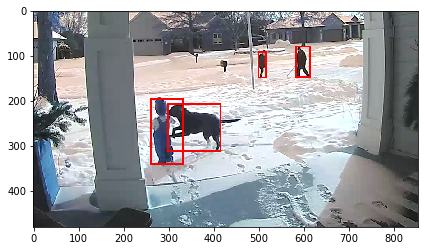

In [133]:
io.imshow(dogs_with_boxes.permute(1, 2, 0).numpy())

In [125]:
pred

[{'boxes': tensor([[582.0923,  77.0656, 615.4733, 147.6301],
          [298.1732, 204.4003, 417.6463, 313.1516],
          [260.4308, 194.5636, 334.8811, 341.8208],
          [498.8227,  89.2485, 517.2006, 149.5921],
          [281.2262, 199.1523, 394.4760, 327.2391],
          [575.1465, 144.4034, 621.8151, 150.1294],
          [267.5684, 213.4614, 467.6121, 352.7688],
          [255.0253, 311.0345, 508.6382, 417.4966],
          [118.4244,  17.2094, 255.6242, 446.0590],
          [266.5624, 199.3888, 387.9608, 334.8145],
          [267.5684, 213.4614, 467.6121, 352.7688],
          [119.2136,  13.5823, 258.5691, 448.8122],
          [557.7744, 145.8746, 611.6239, 149.8979],
          [263.9150, 273.8279, 474.2277, 381.4571],
          [285.1892, 204.6592, 425.3521, 327.3970],
          [482.6551, 146.2304, 516.7501, 151.7909],
          [303.3140, 204.4010, 418.1808, 314.7790],
          [579.0005, 148.3970, 618.4930, 153.7453],
          [500.1483,  93.0056, 515.1196, 143.1191],
   

In [141]:
## resizing and trying it out
import skimage.transform
skimage.transform.resize(frames[260], 400)

TypeError: 'int' object is not iterable

In [140]:
frames[260].shape

(480, 854, 3)

In [136]:
skimage.__version__

'0.18.1'

In [ ]:
%%time
model.eval()
pred = model([t_frame_norm.permute(2, 0, 1)])

### Non Maximum Supression